# Table of Content
01. Import Libraries
02. Import Data
03. Correlation Heatmap
04. Pair Plot
05. Scatterplots
06. Answer Question and Define Hypotheses
07. Export Data

# 01. Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Adjust setting to allow seeing all the rows in the output of this notebook
pd.options.display.max_rows = None

In [3]:
# Adjust setting to allow seeing all the columns in the output of this notebook
pd.options.display.max_columns = None

In [4]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

# 02. Import Data

In [5]:
# Define the main project folder path
path = r'C:\Users\saich\Desktop\CareerFoundry\Data Immersion\Achievement 6 Advanced Analytics & Dashboard Design\11-2023 HDB Flat Resale Analysis'

In [6]:
# Import 'flat_resale_all_w_cpi (geodata).pkl' from 'Prepared Data' folder
flat_resale = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'flat_resale_all_w_cpi (geodata).pkl'))

In [7]:
flat_resale.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,row_id,address,latitude,longitude,geometry,nearest_station,station_distance,station_opening,station_closure,cpi_all_items,adjusted_resale_price,region,interchange_flag,storey_range_midpoint
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,9000.0,86,0,309 ANG MO KIO AVE 1,1.365517,103.843968,POINT (29185.176 38617.449),Ang Mo Kio MRT Station (NS16),790.831215,1987-11-07,NaT,62.0,14516.129032,North East,normal station,11
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,1977,6000.0,86,1,309 ANG MO KIO AVE 1,1.365517,103.843968,POINT (29185.176 38617.449),Ang Mo Kio MRT Station (NS16),790.831215,1987-11-07,NaT,62.0,9677.419355,North East,normal station,5
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,8000.0,86,2,309 ANG MO KIO AVE 1,1.365517,103.843968,POINT (29185.176 38617.449),Ang Mo Kio MRT Station (NS16),790.831215,1987-11-07,NaT,62.0,12903.225806,North East,normal station,11
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,Improved,1977,6000.0,86,3,309 ANG MO KIO AVE 1,1.365517,103.843968,POINT (29185.176 38617.449),Ang Mo Kio MRT Station (NS16),790.831215,1987-11-07,NaT,62.0,9677.419355,North East,normal station,8
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,47200.0,85,4,216 ANG MO KIO AVE 1,1.366197,103.841505,POINT (28911.052 38692.617),Ang Mo Kio MRT Station (NS16),986.842379,1987-11-07,NaT,62.0,76129.032258,North East,normal station,5


In [8]:
flat_resale.shape

(915371, 25)

# 03. Correlation Heatmap

In [9]:
# Create a list that contains only numerical variables to be analyzed

# The adjusted resale price is the resale price adjusted with CPI. 
# This is to minimize the effect of inflation on currency value and level the ground for price comparison across time periods.

# Since 'adjusted_resale_price' was derived from 'resale_price' and 'cpi_all_items', 
# therefore 'resale_price' and 'cpi_all_items' would not be included to prevent redundancy. 

cols = ['floor_area_sqm', 'remaining_lease', 'station_distance', 'storey_range_midpoint', 'adjusted_resale_price']

In [10]:
# Create a data subset that contains only numerical variables to be analyzed
flat_resale_sub = flat_resale[cols]

In [11]:
flat_resale_sub.head()

,floor_area_sqm,remaining_lease,station_distance,storey_range_midpoint,adjusted_resale_price
0,31.0,86,790.831215,11,14516.129032
1,31.0,86,790.831215,5,9677.419355
2,31.0,86,790.831215,11,12903.225806
3,31.0,86,790.831215,8,9677.419355
4,73.0,85,986.842379,5,76129.032258


In [12]:
# Take a look on the correlation matrix
flat_resale_sub.corr()

,floor_area_sqm,remaining_lease,station_distance,storey_range_midpoint,adjusted_resale_price
floor_area_sqm,1.000000,0.335106,0.035543,0.043656,0.702043
remaining_lease,0.335106,1.000000,0.114889,0.074194,0.095766
station_distance,0.035543,0.114889,1.000000,-0.062832,-0.108193
storey_range_midpoint,0.043656,0.074194,-0.062832,1.000000,0.241257
adjusted_resale_price,0.702043,0.095766,-0.108193,0.241257,1.000000


[Text(0.5, 1.0, 'Correlation Heatmap of Flat Resale Transactions')]

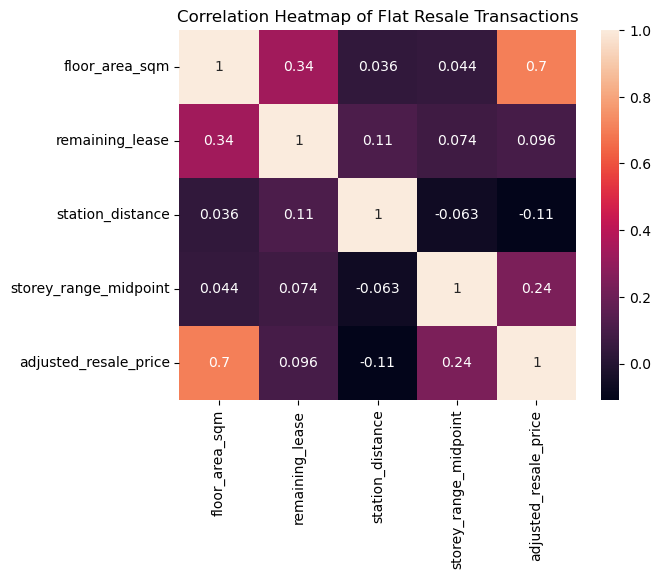

In [13]:
# Create a correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.
corr_heatmap = sns.heatmap(flat_resale_sub.corr(), annot=True)
corr_heatmap.set(title='Correlation Heatmap of Flat Resale Transactions')

In [14]:
# Export 'corr_heatmap'
corr_heatmap.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'corr_heatmap.png'), bbox_inches='tight')

<b><u>Interpretation: </u></b><br>
<b>Adjusted resale price</b>
   - <b>with floor area sqm: </b>Positive and strong correlation <b>(0.70)</b>. The larger the floor area, the higher the adjusted resale price. 
   - <b>with remaining lease: </b>Positive but weak correlation <b>(0.09)</b>. Not as strong as expected. 
   - <b>with station distance: </b>Negative but weak correlation <b>(-0.11)</b>. Not as strong as expected. 
   - <b>with storey range midpoint: </b>Positive but weak correlation <b>(0.24)</b>. 

# 04. Pair Plot

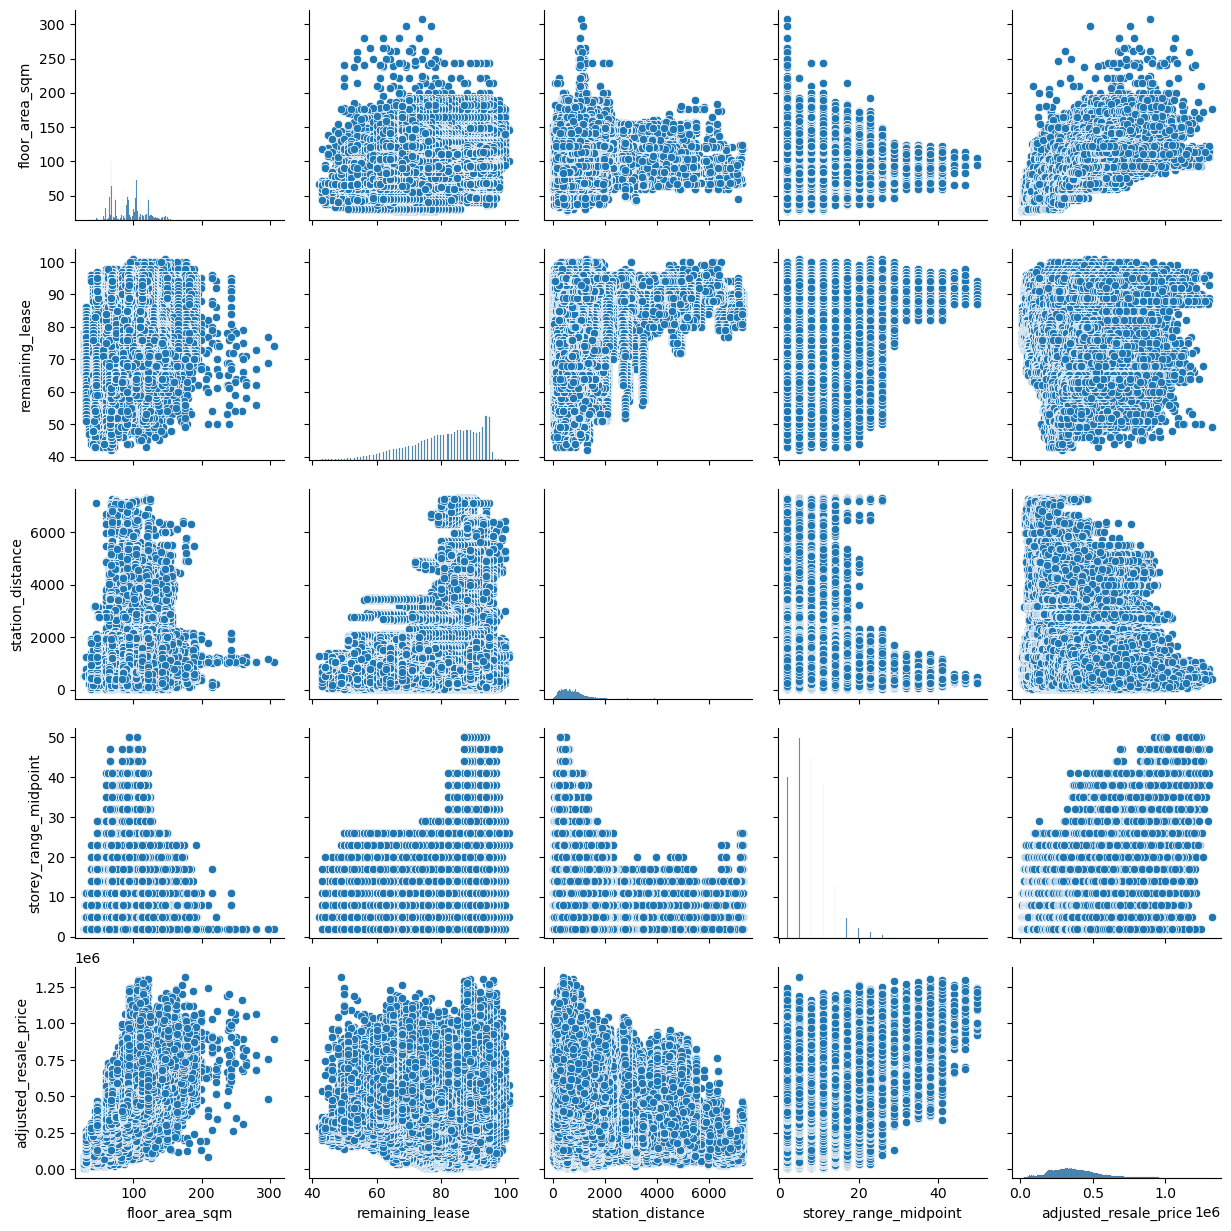

In [15]:
# Create a pair plot on the numerical variables to be analyzed. 
pair_plot = sns.pairplot(flat_resale_sub)

In [16]:
# Export 'pair_plot'
pair_plot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pair_plot.png'), bbox_inches='tight')

<b><u>Interpretation: </u></b><br>
By looking at the first four scatterplots on the last row, it gives a clearer picture to see how each variable relates to adjusted resale price. <br>

<b>Adjusted resale price</b>
   - <b>with floor area sqm (corr 0.70): </b> Positive linear relationship as expected. 
   - <b>with remaining lease (corr 0.096): </b> No relationship could be seen.
   - <b>with station distance (corr -0.11): </b> Although the correlation is weak, the highest adjusted resale price decreases when the station distance increases. 
   - <b>with storey range midpoint (corr 0.24): </b> Although the correlation is weak, the highest adjusted resale price increases when the storey range midpoint increases. 
   
Scatterplots for floor area sqm, station distance and storey range midpoint would be made below.

# 05. Scatterplots

### 05.1 Scatterplot of adjusted_resale_price for floor_area_sqm 

Text(0.5, 1.0, 'Adjusted Resale Price against Floor Area')

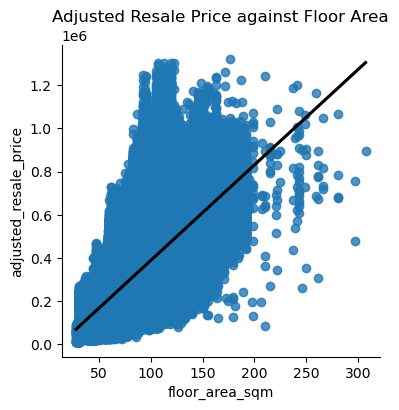

In [17]:
scatter_price_vs_floor_area = sns.lmplot(data=flat_resale, x='floor_area_sqm', y='adjusted_resale_price', 
                                         line_kws={'color': 'black'}, height=4)
plt.title('Adjusted Resale Price against Floor Area')

In [18]:
# Export 'scatter_price_vs_floor_area'
scatter_price_vs_floor_area.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_price_vs_floor_area.png'), 
                                           bbox_inches='tight')

<b><u>Interpretation: </u></b><br>
The scatterplot clearly illustrates the positive linear relationship between adjusted resale price and floor area. However, there are quite a lot of data points are not very close to the regression line. This is why the correlation coefficient is only 0.70 and not higher.

### 05.2  Scatterplots of adjusted_resale_price for remaining_lease, station_distance, storey_range_midpoint

<Axes: xlabel='adjusted_resale_price', ylabel='Count'>

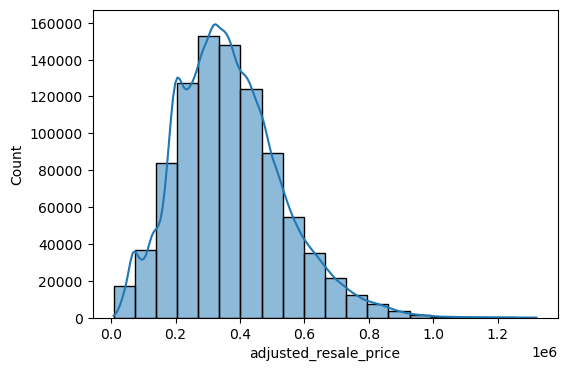

In [19]:
# Use a histogram to visualize the distribution of the variables. 
# The argument "kde" add a line that encompasses the distribution

plt.figure(figsize=(6, 4))
sns.histplot(flat_resale['adjusted_resale_price'], bins = 20, kde = True)

In [20]:
# Split 'adjusted_resale_price' into different categories 
flat_resale.loc[flat_resale['adjusted_resale_price'] <= 200000, 'adj_resale_price_category'] = 'Low price'
flat_resale.loc[(flat_resale['adjusted_resale_price'] > 200000) & 
                (flat_resale['adjusted_resale_price'] <= 500000), 'adj_resale_price_category'] = 'Medium price'
flat_resale.loc[flat_resale['adjusted_resale_price'] > 500000, 'adj_resale_price_category'] = 'High price'

In [21]:
flat_resale['adj_resale_price_category'].value_counts(dropna = False)

adj_resale_price_category
Medium price    611152
High price      175948
Low price       128271
Name: count, dtype: int64

In [22]:
flat_resale.shape

(915371, 26)

[Text(0.5, 1.0, 'Adjusted Resale Price against Storey Range Midpoint')]

C:\Users\saich\anaconda3\envs\geo_env\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\saich\anaconda3\envs\geo_env\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


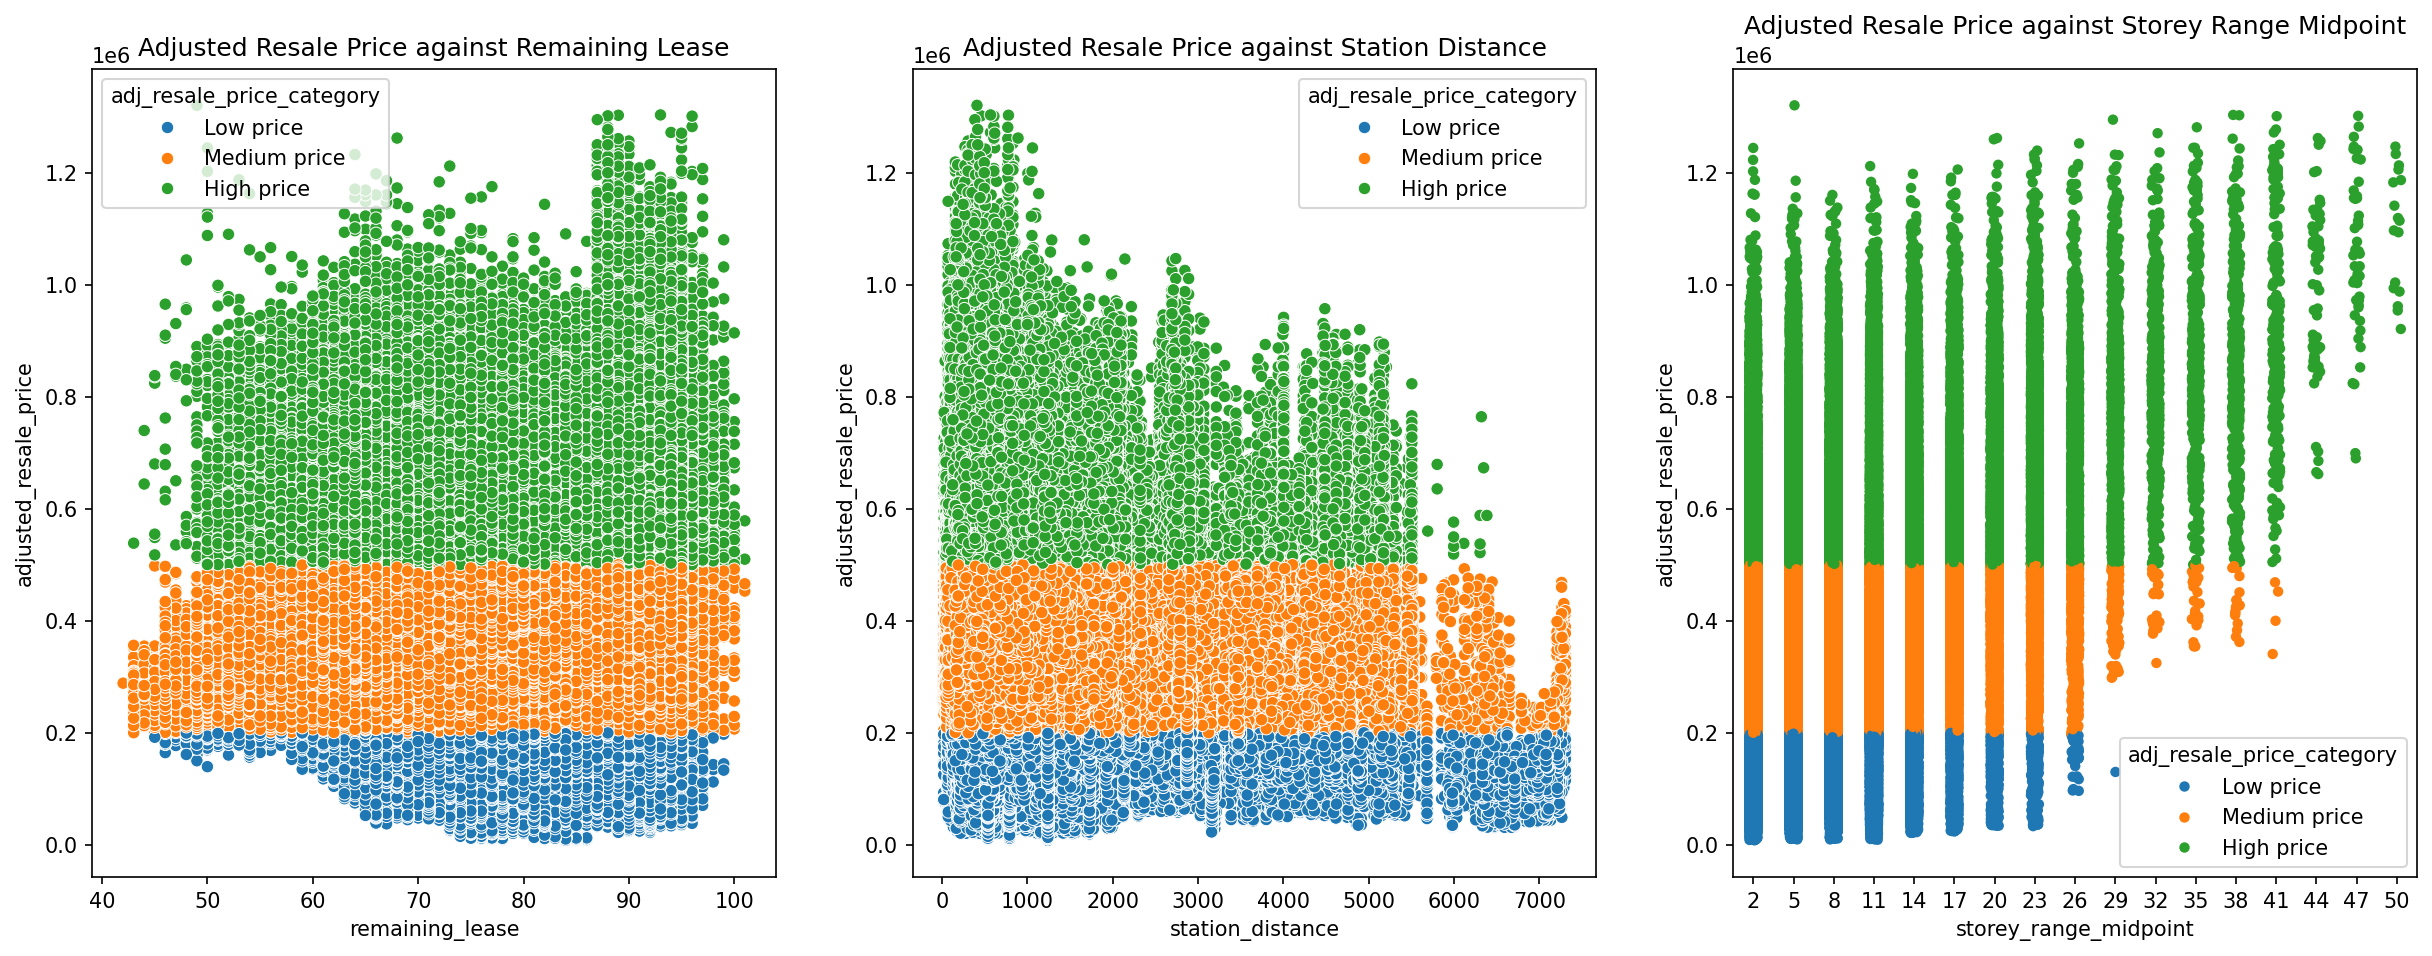

In [23]:
# Make scatterplots of 'adjusted_resale_price' for 'remaining_lease', 'station_distance' and 'storey_range_midpoint'
scatter_price_vs_numerical_variables, ax = plt.subplots(1, 3, figsize=(20, 7), dpi=150)

h = sns.scatterplot(data=flat_resale, x='remaining_lease', y='adjusted_resale_price', hue='adj_resale_price_category', ax=ax[0])
h.set(title='Adjusted Resale Price against Remaining Lease')

j = sns.scatterplot(data=flat_resale, x='station_distance', y='adjusted_resale_price', hue='adj_resale_price_category', ax=ax[1])
j.set(title='Adjusted Resale Price against Station Distance')

k = sns.stripplot(data=flat_resale, x='storey_range_midpoint', y='adjusted_resale_price', hue='adj_resale_price_category', ax=ax[2])
k.set(title='Adjusted Resale Price against Storey Range Midpoint')

In [24]:
# Export 'scatter_price_vs_numerical_variables'
scatter_price_vs_numerical_variables.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_price_vs_numerical_variables.png'), 
                                                    bbox_inches='tight')

C:\Users\saich\AppData\Local\Temp\ipykernel_14108\973157993.py:2: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  scatter_price_vs_numerical_variables.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_price_vs_numerical_variables.png'),


<b><u>Interpretation: </b></u><br>
From the scatterplots above, the minimum adjusted resale price tends to increase a bit when remaining lease drops to 60 and below. This might because the resale of those flats tends to happen in more recent years, at the same time the overall market price has increased over the years. Other than that, there is no insights could be found. 

For station distance and storey range midpoint, even there is no strong correlation, they could be other good indicators as well because: 
- For station distance, the adjusted resale price would never be high when flats are far from train station (except a few outliers).
- For storey range midpoint, the adjusted resale price would never be low at the high storey ranges. 

Let's see the average remaining lease, station distance and storey range midpoint for each adjusted resale price category.

### 05.3 Average remaining lease, station distance, storey range midpoint for each adjusted resale price category

In [25]:
remaining_lease_mean = flat_resale.groupby('adj_resale_price_category').agg(remaining_lease_mean=('remaining_lease', 'mean'))
remaining_lease_mean.reset_index(inplace=True)
remaining_lease_mean

,adj_resale_price_category,remaining_lease_mean
0,High price,83.473970
1,Low price,81.978842
2,Medium price,80.365174


In [26]:
station_distance_mean = flat_resale.groupby('adj_resale_price_category').agg(station_distance_mean=('station_distance', 'mean'))
station_distance_mean.reset_index(inplace=True)
station_distance_mean

,adj_resale_price_category,station_distance_mean
0,High price,817.488799
1,Low price,1120.863801
2,Medium price,893.025940


In [27]:
storey_range_midpoint_mean = flat_resale.groupby('adj_resale_price_category').agg(storey_range_midpoint_mean=('storey_range_midpoint', 'mean'))
storey_range_midpoint_mean.reset_index(inplace=True)
storey_range_midpoint_mean

,adj_resale_price_category,storey_range_midpoint_mean
0,High price,9.674034
1,Low price,6.792034
2,Medium price,7.288843


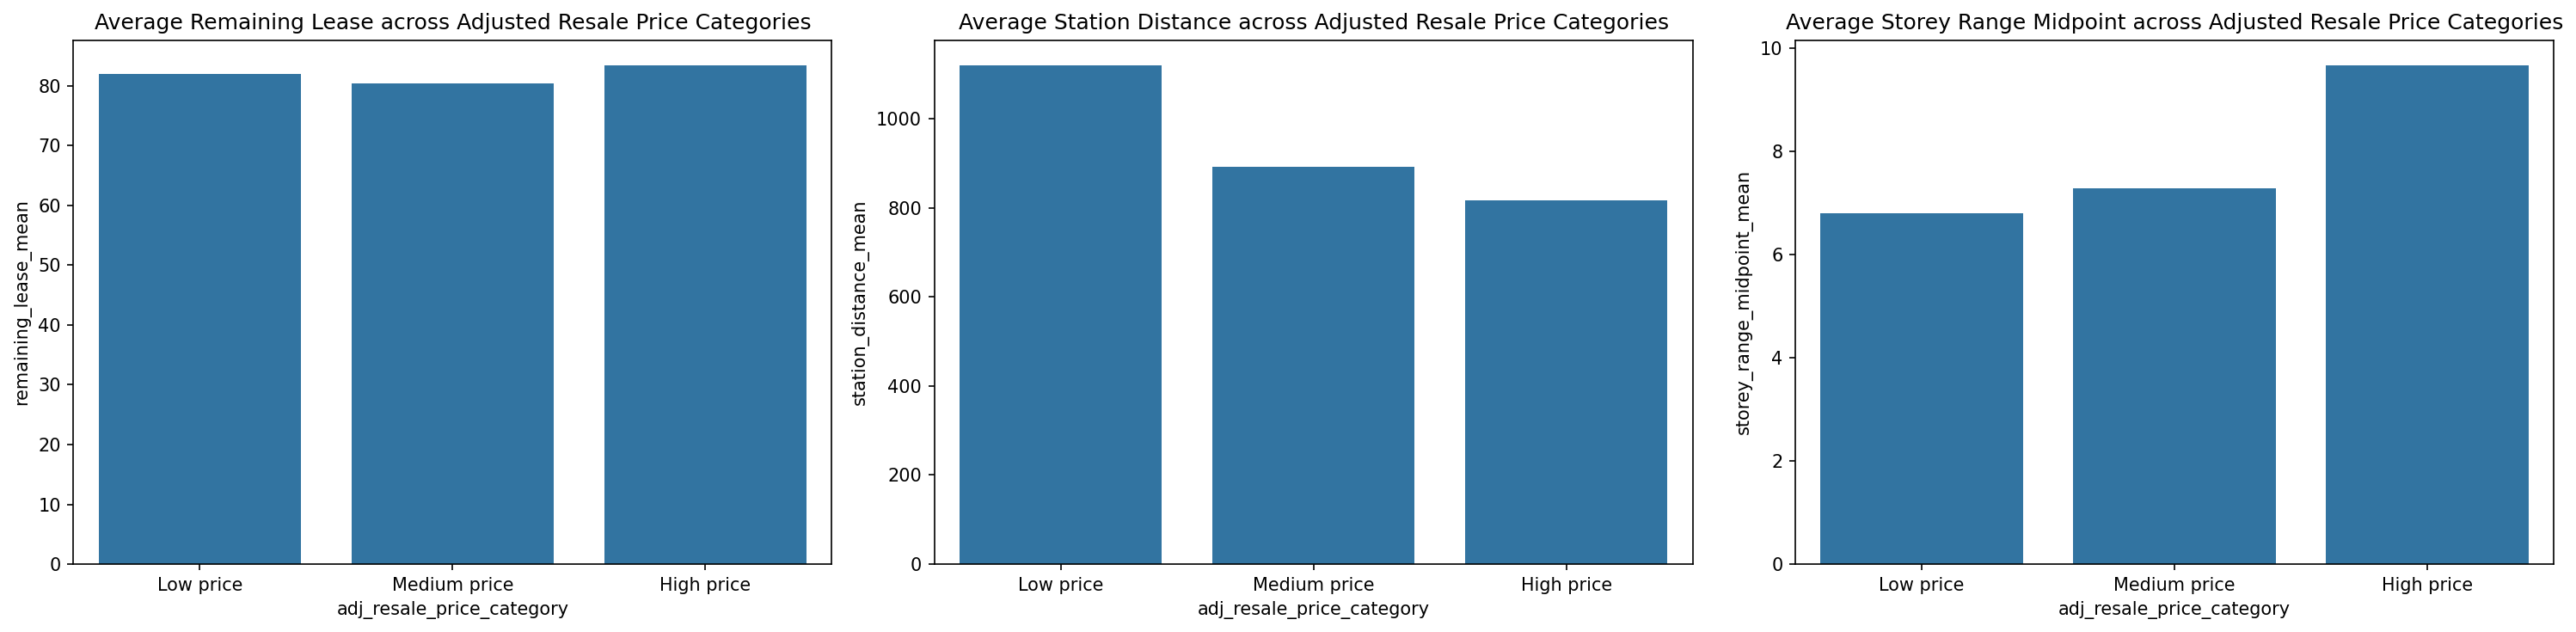

In [28]:
# Make bar charts of average remaining lease, station distance and storey range midpoint across adjusted resale price categories
bar_numerical_data_mean_vs_price_category, ax = plt.subplots(1, 3, figsize=(20, 5), dpi=150)

order = ['Low price', 'Medium price', 'High price']

h = sns.barplot(data=remaining_lease_mean, x='adj_resale_price_category', y='remaining_lease_mean', order=order, ax=ax[0])
h.set(title='Average Remaining Lease across Adjusted Resale Price Categories')

j = sns.barplot(data=station_distance_mean, x='adj_resale_price_category', y='station_distance_mean', order=order, ax=ax[1])
j.set(title='Average Station Distance across Adjusted Resale Price Categories')

k = sns.barplot(data=storey_range_midpoint_mean, x='adj_resale_price_category', y='storey_range_midpoint_mean', order=order, ax=ax[2])
k.set(title='Average Storey Range Midpoint across Adjusted Resale Price Categories')

plt.tight_layout()

In [29]:
# Export 'bar_numerical_data_mean_vs_price_category'
bar_numerical_data_mean_vs_price_category.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_numerical_data_mean_vs_price_category.png'), 
                                                         bbox_inches='tight')

<b><u>Interpretation: </b></u><br>
- The difference in average remaining lease across different adjusted resale price categories is minor. 
- The average station distance is the highest for the low adjusted resale price category, and the lowest for the high adjusted resale price category. 
- The average storey range midpoint is the highest for the high adjusted resale price category, and the low adjusted resale price category. 

These are aligned with the interpretation from the scatterplots above. 

# 06. Answer Question and Define Hypotheses

<b><u>Question: </u></b><br>
1) Which factors below would affect the resale price of the resale flats? 
   - floor area (sqm), remaining lease, distance to nearest train station (m), storey range midpoint

From the correlation heatmap and scatterplots above: 
- We can see that floor area is the only factor in this dataset that could affect the adjusted resale price given the correlation coefficient is 0.70. 
- Although station distance and storey range midpoint might be a good indicator as well, their correlation coefficient with adjusted resale price are weak (-0.11 and 0.24 respectively). 
- Remaining lease seems do not affect the adjusted resale price given the low correlation coefficient (0.096) and the absence of trend in scatterplot. 

<b><u>Hypothesis: </u></b><br>
- The larger the floor area, the higher the adjusted resale price. 

# 07. Export Data

In [30]:
flat_resale.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,row_id,address,latitude,longitude,geometry,nearest_station,station_distance,station_opening,station_closure,cpi_all_items,adjusted_resale_price,region,interchange_flag,storey_range_midpoint,adj_resale_price_category
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,9000.0,86,0,309 ANG MO KIO AVE 1,1.365517,103.843968,POINT (29185.176 38617.449),Ang Mo Kio MRT Station (NS16),790.831215,1987-11-07,NaT,62.0,14516.129032,North East,normal station,11,Low price
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,1977,6000.0,86,1,309 ANG MO KIO AVE 1,1.365517,103.843968,POINT (29185.176 38617.449),Ang Mo Kio MRT Station (NS16),790.831215,1987-11-07,NaT,62.0,9677.419355,North East,normal station,5,Low price
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,8000.0,86,2,309 ANG MO KIO AVE 1,1.365517,103.843968,POINT (29185.176 38617.449),Ang Mo Kio MRT Station (NS16),790.831215,1987-11-07,NaT,62.0,12903.225806,North East,normal station,11,Low price
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,Improved,1977,6000.0,86,3,309 ANG MO KIO AVE 1,1.365517,103.843968,POINT (29185.176 38617.449),Ang Mo Kio MRT Station (NS16),790.831215,1987-11-07,NaT,62.0,9677.419355,North East,normal station,8,Low price
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,47200.0,85,4,216 ANG MO KIO AVE 1,1.366197,103.841505,POINT (28911.052 38692.617),Ang Mo Kio MRT Station (NS16),986.842379,1987-11-07,NaT,62.0,76129.032258,North East,normal station,5,Low price


In [31]:
flat_resale.shape

(915371, 26)

In [32]:
# Export 'flat_resale' to 'Prepared Data' folder in pkl format
flat_resale.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'flat_resale_all_explored (geodata).pkl'))